In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../../data/miner/09517617000153_3.csv')
df.head()

,data,produtoId,descr,valor,quantidade,valorCancelado,quantidadeCancelada,quantidadeDocumentos,quantidadeValorZero
0,2019-01-02,1001,CREME DENTAL CLOSEUP TRIPLE 70G MENTA,2.79,1.0,0.00,0.0,1,0.0
1,2019-01-02,10012802,MASTRUZ HORTA VERDE UN,19.90,10.0,3.98,2.0,9,0.0
2,2019-01-02,10022,LIXA UNHA M BONI 6 UND,2.59,1.0,0.00,0.0,1,0.0
3,2019-01-02,100328,POLVILHO YOKI 500G AZEDO,9.49,1.0,0.00,0.0,1,0.0
4,2019-01-02,100335,SHAMPOO PROCAO 500ML PELOS CLAROS,7.99,1.0,0.00,0.0,1,0.0


In [3]:
df[["data"]]       = df[["data"]].apply(pd.to_datetime)
df[["valor"]]      = df[["valor"]].apply(pd.to_numeric)
df[["quantidade"]] = df[["quantidade"]].apply(pd.to_numeric)
df[["produtoId"]]  = df[["produtoId"]].apply(pd.to_numeric)

df['valorReal'] =  df['valor'] - df['valorCancelado']

In [4]:
df = df.drop(['valorCancelado', 'quantidadeCancelada', 'quantidadeDocumentos', 'quantidadeValorZero'], axis=1)

## Create dataset

### Accumulation per day

In [5]:
df_by_day = df['valorReal'].groupby(df['data'].dt.to_period('D')).sum()
df_by_day = df_by_day.to_frame()
df_by_day.head()

,valorReal
data,
2019-01-02,118614.91
2019-01-03,102057.86
2019-01-04,91499.58
2019-01-05,84989.54
2019-01-06,74242.22


In [6]:
df_by_day.tail()

,valorReal
data,
2020-02-14,56837.63
2020-02-15,87972.64
2020-02-16,69500.47
2020-02-17,66206.28
2020-02-18,53597.49


### Accumulation per week

In [7]:
df_by_week = df['valorReal'].groupby(df['data'].dt.to_period('W')).sum()
df_by_week = df_by_week.to_frame()

df_by_week.index = pd.DatetimeIndex(df_by_week.index.end_time.strftime('%Y-%m-%d'))
df_by_week.index.name = 'data'

df_by_week = df_by_week[:-1]
df_by_week['semana'] = df_by_week.index.week

df_by_week.head()

,valorReal,semana
data,,
2019-01-06,471404.11,1
2019-01-13,397400.65,2
2019-01-20,265203.19,3
2019-01-27,366205.99,4
2019-02-03,559199.92,5


In [8]:
df_by_week.tail()

,valorReal,semana
data,,
2020-01-19,396216.07,3
2020-01-26,419436.11,4
2020-02-02,538717.99,5
2020-02-09,573118.60,6
2020-02-16,467493.28,7


### Accumulation per month

In [9]:
df_by_month = round(df['valorReal'].groupby(df['data'].dt.to_period('M')).sum(),4)
df_by_month = df_by_month.to_frame()

#df_by_month = df_by_month[:-1]
df_by_month['mes'] = df_by_month.index.month

df_by_month.head()

,valorReal,mes
data,,
2019-01,1750747.66,1
2019-02,1734923.14,2
2019-03,2093308.82,3
2019-04,2004346.64,4
2019-05,1891051.01,5


In [10]:
df_by_month.tail()

,valorReal,mes
data,,
2019-10,2041344.21,10
2019-11,1828478.39,11
2019-12,2418845.36,12
2020-01,2009527.79,1
2020-02,1371184.12,2


## Datasets of feateures to be analyzed

### Closing oscillations of the exchange's trading papers (2019.1 - 2020.2)

#### Week

In [11]:
df_osc_w = pd.read_csv('../../../data/miner/osc_week_comercio_bolsa.csv')

df_osc_w.index   = pd.DatetimeIndex(df_osc_w['Date']) 
df_osc_w.drop(['Date'], axis=1, inplace=True)
df_osc_w.index.name = 'data' 

df_osc_w.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,
2019-01-06,-1.207822,-1.280451,1.042645,0.773404,-2.847543,0.000000,2.518203,0.473553,1.573536,-1.866613,-2.634699,1.152987,-1.085764,-2.110379,-0.796484
2019-01-13,1.310370,0.973084,0.642865,1.062203,0.829055,0.000000,0.264555,0.904002,0.322163,-0.072868,0.148359,0.597525,0.816180,-0.097256,1.067672
2019-01-20,0.379754,1.514371,0.839685,0.575950,-0.561303,3.277592,0.530649,0.022534,0.957199,-0.660401,0.977336,-1.363679,-0.028960,-0.389889,-0.069077
2019-01-27,-0.237947,2.859634,0.999130,0.007966,0.338326,2.000000,1.370225,-0.421800,0.551158,0.411240,0.312541,1.642150,0.321620,-1.045036,0.009879
2019-02-03,1.008610,1.584443,0.276039,0.588054,-0.182030,0.000000,1.500619,-0.725741,1.997007,1.180296,0.537466,1.655389,-0.279729,1.266394,0.094062


In [12]:
df_osc_w.tail()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,
2020-02-02,-0.881993,-1.490315,-0.346919,-0.073961,-0.222781,-0.012508,0.923725,0.286714,-1.220040,-1.153610,-0.942884,-1.150567,-0.120703,-0.179924,-1.005205
2020-02-09,-0.973259,0.411908,0.304432,-0.080341,-1.053634,-1.454228,0.762742,1.628173,-0.683641,0.111812,-0.681358,-0.522505,-0.920798,-0.592109,-1.021993
2020-02-16,0.676568,0.506893,0.352415,0.209990,0.602059,1.257862,1.693920,-0.701478,0.577967,0.549482,0.301829,0.724919,0.348845,0.720706,0.667442
2020-02-23,0.582092,2.378220,-0.125156,0.123159,1.374008,0.797101,0.863309,-0.625628,-1.069818,0.526923,-0.166331,2.294445,1.637615,0.016743,1.214457
2020-03-01,-8.463600,-10.068458,-2.914110,-0.828598,-5.304229,4.074605,0.000000,-2.791663,-3.036500,-3.432537,-2.737495,-5.711061,-4.886933,-5.901934,-4.441440


#### Month

In [13]:
df_osc_m = pd.read_csv('../../../data/miner/osc_month_comercio_bolsa.csv')
df_osc_m[["Date"]]       = df_osc_m[["Date"]].apply(pd.to_datetime)

df_osc_m.index = df_osc_m['Date'].dt.to_period('M')
df_osc_m.drop(['Date'], axis=1, inplace=True)
df_osc_m.index.name = 'data'

df_osc_m.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,
2019-01,0.705984,1.495413,0.670745,0.626157,-0.273718,1.219398,0.951151,0.096182,1.108045,-0.046613,0.197302,0.571846,0.190304,-0.217671,0.317030
2019-02,-0.203635,-1.432613,-0.283899,-0.150027,-0.369437,-0.001457,0.100065,-0.861824,-0.333760,-0.105366,-0.270571,-0.119217,-0.222118,-0.214189,-0.298706
2019-03,-0.848192,-0.495282,-0.375707,-0.458152,-0.109513,-0.413223,0.241936,-0.223615,-0.211222,-0.441122,0.046937,0.215540,-0.745883,-0.040530,-1.004102
2019-04,-0.513185,-0.168791,-0.314148,-0.246481,-0.013389,0.329670,-1.106988,0.368143,-0.407992,0.083289,0.304639,1.009699,-0.165103,0.450086,-0.322249
2019-05,-0.958117,0.551754,0.233630,0.334246,-0.697798,-0.796523,0.465057,0.322385,-0.865393,-0.059117,0.131502,-1.381156,0.017291,0.077726,0.096336


In [14]:
df_osc_m.tail()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,
2019-10,0.187140,-0.298392,0.063420,-0.067310,-0.112500,0.113067,0.291962,0.097757,-0.132815,0.754472,0.010729,0.492468,0.040992,0.776114,-0.008135
2019-11,0.516912,0.863795,0.204324,0.425652,0.066664,2.224854,1.659780,-0.166219,-1.427468,0.273397,0.090200,0.263451,0.435590,0.001537,0.548772
2019-12,0.554813,1.193729,0.717815,0.706131,0.917123,-0.158788,0.519176,0.355621,0.316975,0.112713,0.421742,0.751981,0.933303,0.293242,0.783943
2020-01,0.531657,0.965812,-0.079626,0.460902,0.808543,0.814972,1.036620,-0.031614,-0.045025,-0.286905,0.090336,0.027181,0.730604,0.684593,0.262912
2020-02,-0.911776,-0.214813,-0.186457,-0.023127,-0.352723,0.656052,0.976462,-0.239882,-0.702968,-0.054352,-0.482605,0.062481,-0.261503,-0.651598,-0.269609


### Average volume of stock exchange trading papers (2019.1 - 2020.2)

#### Week

In [15]:
df_vol_w = pd.read_csv('../../../data/miner/vol_week_comercio_bolsa.csv')

df_vol_w.index = pd.DatetimeIndex(df_vol_w['Date']) 
df_vol_w.drop(['Date'], axis=1, inplace=True)
df_vol_w.index.name = 'data'

df_vol_w.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,
2019-01-06,1.743804e+06,7.863833e+06,1900.0,12366.666667,1.185867e+06,0.0,5000.0,1.704233e+06,2200.0,355900.0,4.703307e+06,7.511333e+05,8.991743e+05,6756800.0,5.575826e+06
2019-01-13,3.109568e+06,1.781732e+07,1700.0,12640.000000,7.390400e+05,0.0,4100.0,2.431200e+06,2180.0,366300.0,4.226552e+06,6.353600e+05,2.518919e+06,6364160.0,4.962192e+06
2019-01-20,2.125506e+06,2.090864e+07,1240.0,17020.000000,6.897600e+05,20.0,2000.0,1.476740e+06,20800.0,504160.0,6.360970e+06,9.387400e+05,7.530190e+05,7685280.0,3.807211e+06
2019-01-27,2.441360e+06,2.159468e+07,575.0,18350.000000,8.944000e+05,675.0,2225.0,1.274850e+06,3400.0,386275.0,3.300605e+06,2.933450e+06,1.127161e+06,11222200.0,4.522657e+06
2019-02-03,3.007262e+06,2.725254e+07,2500.0,5020.000000,7.699200e+05,0.0,3660.0,2.016060e+06,5200.0,534860.0,3.770932e+06,1.511700e+06,1.028249e+06,8572480.0,5.874104e+06


In [16]:
df_vol_w.tail()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,
2020-02-02,2354280.0,50248020.0,2000.0,22880.0,741300.0,20.0,480.0,3649800.0,159420.0,619680.0,4420280.0,2923580.0,1662100.0,9720180.0,6420420.0
2020-02-09,1506920.0,31146540.0,3960.0,15060.0,1041380.0,140.0,1260.0,4429280.0,138380.0,377060.0,8522860.0,1778460.0,2423620.0,8608520.0,6521300.0
2020-02-16,2310040.0,38394780.0,1080.0,5860.0,841160.0,140.0,1380.0,3596700.0,121240.0,529520.0,4745460.0,2065400.0,1899500.0,11152100.0,5049240.0
2020-02-23,2238140.0,40763640.0,980.0,5860.0,1151760.0,520.0,2540.0,1558380.0,102900.0,448820.0,3000960.0,3027720.0,1243260.0,11571160.0,5443380.0
2020-03-01,5151700.0,81584650.0,2500.0,16900.0,1770350.0,250.0,0.0,3198600.0,87100.0,905500.0,10324600.0,6637400.0,1367900.0,17202250.0,10815650.0


#### Month

In [17]:
df_vol_m = pd.read_csv('../../../data/miner/vol_month_comercio_bolsa.csv')
df_vol_m[["Date"]]       = df_vol_m[["Date"]].apply(pd.to_datetime)

df_vol_m.index =  df_vol_m['Date'].dt.to_period('M')
df_vol_m.drop(['Date'], axis=1, inplace=True)
df_vol_m.index.name = 'data'

df_vol_m.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,
2019-01,2.484543e+06,1.989911e+07,1447.619048,13276.190476,815314.285714,133.333333,3204.761905,1.774495e+06,7300.000000,440604.761905,4.570757e+06,1.338733e+06,1.304159e+06,8.242971e+06,4.766904e+06
2019-02,2.344898e+06,2.360691e+07,2020.000000,6300.000000,689640.000000,535.000000,7360.000000,2.718345e+06,3930.000000,402190.000000,4.116321e+06,8.424100e+05,1.015273e+06,8.562320e+06,4.997924e+06
2019-03,2.658507e+06,1.105843e+07,1183.333333,9838.888889,504933.333333,166.666667,4016.666667,3.010150e+06,6161.111111,389444.444444,4.566687e+06,9.774111e+05,1.875181e+06,8.149689e+06,7.765314e+06
2019-04,2.551418e+06,1.313628e+07,923.809524,17223.809524,661104.761905,47.619048,3942.857143,2.790462e+06,5995.238095,356033.333333,4.516233e+06,1.333424e+06,7.651650e+05,7.981524e+06,7.155961e+06
2019-05,3.096315e+06,2.031841e+07,1150.000000,10627.272727,935418.181818,86.363636,2304.545455,2.716950e+06,6540.909091,299445.454545,3.927686e+06,8.243909e+05,8.147924e+05,9.401745e+06,5.608214e+06


In [18]:
df_vol_m.tail()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,
2019-10,2.943200e+06,2.198758e+07,860.869565,11756.521739,5.800739e+05,521.739130,4013.043478,1.408070e+06,8534.782609,520373.913043,3.901535e+06,1.371487e+06,1.379288e+06,1.083396e+07,3.711329e+06
2019-11,2.389368e+06,3.271301e+07,1421.052632,24110.526316,6.951263e+05,705.263158,2442.105263,1.756205e+06,40594.736842,471157.894737,3.936000e+06,1.671758e+06,1.696735e+06,1.607026e+07,4.736694e+06
2019-12,2.410284e+06,5.259542e+07,2015.789474,10436.842105,8.865526e+05,531.578947,1673.684211,2.261142e+06,139494.736842,688278.947368,3.709658e+06,3.083416e+06,1.889883e+06,9.512489e+06,5.893124e+06
2020-01,1.981027e+06,4.630795e+07,3272.727273,14250.000000,8.806682e+05,386.363636,4990.909091,2.668005e+06,244840.909091,695359.090909,3.935991e+06,2.741968e+06,2.020586e+06,8.516386e+06,6.094800e+06
2020-02,2.386994e+06,4.204083e+07,2064.705882,9864.705882,1.100718e+06,264.705882,1523.529412,3.195235e+06,116870.588235,505176.470588,5.999741e+06,2.801924e+06,1.798100e+06,1.123902e+07,6.276524e+06


### Average monthly value of the Dollar (2018.12 - 2020.3)

In [19]:
df_dol_m = pd.read_csv('../../../data/miner/media_mensal_dolar_12-18a03-20.csv')
df_dol_m[["Date"]]       = df_dol_m[["Date"]].apply(pd.to_datetime)

df_dol_m = df_dol_m.iloc[1:15] # Eliminando 2018.12 e 2020.3

df_dol_m.index = df_dol_m['Date'].dt.to_period('M')
df_dol_m.drop(['Date'], axis=1, inplace=True)
df_dol_m.index.name = 'data'

df_dol_m.head()

,Último
data,
2019-01,3.740930
2019-02,3.723685
2019-03,3.839833
2019-04,3.897455
2019-05,3.995643


In [20]:
df_dol_m.tail()

,Último
data,
2019-10,4.086309
2019-11,4.160862
2019-12,4.106405
2020-01,4.147635
2020-02,4.351015


### Average monthly value of gasoline in Fortaleza (2018.12 - 2020.2)

In [21]:
df_gas_m = pd.read_csv('../../../data/miner/gasolina_fortaleza.csv')
df_gas_m[["MÊS"]]       = df_gas_m[["MÊS"]].apply(pd.to_datetime)

df_gas_m.index = df_gas_m['MÊS'].dt.to_period('M')
df_gas_m.drop(['Unnamed: 0','MÊS'], axis=1, inplace=True)
df_gas_m.index.name = 'data'

df_gas_m = df_gas_m[1:] # Eliminando 2018.12

df_gas_m.head()

,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO
data,,,,,,,,
2019-01,4.206,0.092,3.899,4.500,3.819,0.069,3.587,3.961
2019-02,4.184,0.218,3.842,4.599,3.788,0.084,3.490,3.972
2019-03,4.568,0.041,4.079,4.620,3.918,0.093,3.565,4.150
2019-04,4.687,0.094,4.170,4.799,4.075,0.090,3.869,4.317
2019-05,4.717,0.084,4.550,4.799,4.166,0.093,3.990,4.347


In [22]:
df_gas_m.tail()

,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO
data,,,,,,,,
2019-10,4.572,0.109,4.190,4.890,4.100,0.057,3.789,4.268
2019-11,4.375,0.125,4.150,4.699,4.079,0.047,3.948,4.210
2019-12,4.644,0.096,4.190,4.799,4.187,0.067,4.018,4.353
2020-01,4.679,0.025,4.390,4.799,4.220,0.060,4.042,4.421
2020-02,4.657,0.040,4.539,4.890,4.135,0.064,3.905,4.410


## Merger of the subscriber with the analyzed features

### Week

In [23]:
print("Assinante: ", len(df_by_week), 
      " - Bolsa oscilações: ", len(df_osc_w), 
      " - Bolsa volume: ", len(df_vol_w))

Assinante:  59  - Bolsa oscilações:  61  - Bolsa volume:  61


In [24]:
df_ass_osc_vol_w = pd.concat( [df_by_week, df_osc_w, df_vol_w], sort=False, axis=1)
df_ass_osc_vol_w.head()

,valorReal,semana,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,...,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,,,,,,,
2019-01-06,471404.11,1.0,-1.207822,-1.280451,1.042645,0.773404,-2.847543,0.000000,2.518203,0.473553,...,0.0,5000.0,1.704233e+06,2200.0,355900.0,4.703307e+06,7.511333e+05,8.991743e+05,6756800.0,5.575826e+06
2019-01-13,397400.65,2.0,1.310370,0.973084,0.642865,1.062203,0.829055,0.000000,0.264555,0.904002,...,0.0,4100.0,2.431200e+06,2180.0,366300.0,4.226552e+06,6.353600e+05,2.518919e+06,6364160.0,4.962192e+06
2019-01-20,265203.19,3.0,0.379754,1.514371,0.839685,0.575950,-0.561303,3.277592,0.530649,0.022534,...,20.0,2000.0,1.476740e+06,20800.0,504160.0,6.360970e+06,9.387400e+05,7.530190e+05,7685280.0,3.807211e+06
2019-01-27,366205.99,4.0,-0.237947,2.859634,0.999130,0.007966,0.338326,2.000000,1.370225,-0.421800,...,675.0,2225.0,1.274850e+06,3400.0,386275.0,3.300605e+06,2.933450e+06,1.127161e+06,11222200.0,4.522657e+06
2019-02-03,559199.92,5.0,1.008610,1.584443,0.276039,0.588054,-0.182030,0.000000,1.500619,-0.725741,...,0.0,3660.0,2.016060e+06,5200.0,534860.0,3.770932e+06,1.511700e+06,1.028249e+06,8572480.0,5.874104e+06


In [25]:
df_ass_osc_vol_w.tail()

,valorReal,semana,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,...,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,,,,,,,
2020-02-02,538717.99,5.0,-0.881993,-1.490315,-0.346919,-0.073961,-0.222781,-0.012508,0.923725,0.286714,...,20.0,480.0,3649800.0,159420.0,619680.0,4420280.0,2923580.0,1662100.0,9720180.0,6420420.0
2020-02-09,573118.60,6.0,-0.973259,0.411908,0.304432,-0.080341,-1.053634,-1.454228,0.762742,1.628173,...,140.0,1260.0,4429280.0,138380.0,377060.0,8522860.0,1778460.0,2423620.0,8608520.0,6521300.0
2020-02-16,467493.28,7.0,0.676568,0.506893,0.352415,0.209990,0.602059,1.257862,1.693920,-0.701478,...,140.0,1380.0,3596700.0,121240.0,529520.0,4745460.0,2065400.0,1899500.0,11152100.0,5049240.0
2020-02-23,NaN,NaN,0.582092,2.378220,-0.125156,0.123159,1.374008,0.797101,0.863309,-0.625628,...,520.0,2540.0,1558380.0,102900.0,448820.0,3000960.0,3027720.0,1243260.0,11571160.0,5443380.0
2020-03-01,NaN,NaN,-8.463600,-10.068458,-2.914110,-0.828598,-5.304229,4.074605,0.000000,-2.791663,...,250.0,0.0,3198600.0,87100.0,905500.0,10324600.0,6637400.0,1367900.0,17202250.0,10815650.0


### Month - Ass-Osc-Vol

In [26]:
print("Assinante: ", len(df_by_month), 
      " - Bolsa oscilações: ", len(df_osc_m), 
      " - Bolsa volume: ", len(df_vol_m))

Assinante:  14  - Bolsa oscilações:  14  - Bolsa volume:  14


In [27]:
df_ass_osc_vol_m = pd.concat( [df_by_month, df_osc_m , df_vol_m], sort=False, axis=1)
df_ass_osc_vol_m.head()

,valorReal,mes,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,...,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,,,,,,,
2019-01,1750747.66,1,0.705984,1.495413,0.670745,0.626157,-0.273718,1.219398,0.951151,0.096182,...,133.333333,3204.761905,1.774495e+06,7300.000000,440604.761905,4.570757e+06,1.338733e+06,1.304159e+06,8.242971e+06,4.766904e+06
2019-02,1734923.14,2,-0.203635,-1.432613,-0.283899,-0.150027,-0.369437,-0.001457,0.100065,-0.861824,...,535.000000,7360.000000,2.718345e+06,3930.000000,402190.000000,4.116321e+06,8.424100e+05,1.015273e+06,8.562320e+06,4.997924e+06
2019-03,2093308.82,3,-0.848192,-0.495282,-0.375707,-0.458152,-0.109513,-0.413223,0.241936,-0.223615,...,166.666667,4016.666667,3.010150e+06,6161.111111,389444.444444,4.566687e+06,9.774111e+05,1.875181e+06,8.149689e+06,7.765314e+06
2019-04,2004346.64,4,-0.513185,-0.168791,-0.314148,-0.246481,-0.013389,0.329670,-1.106988,0.368143,...,47.619048,3942.857143,2.790462e+06,5995.238095,356033.333333,4.516233e+06,1.333424e+06,7.651650e+05,7.981524e+06,7.155961e+06
2019-05,1891051.01,5,-0.958117,0.551754,0.233630,0.334246,-0.697798,-0.796523,0.465057,0.322385,...,86.363636,2304.545455,2.716950e+06,6540.909091,299445.454545,3.927686e+06,8.243909e+05,8.147924e+05,9.401745e+06,5.608214e+06


In [28]:
df_ass_osc_vol_m.tail()

,valorReal,mes,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,...,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,,,,,,,
2019-10,2041344.21,10,0.187140,-0.298392,0.063420,-0.067310,-0.112500,0.113067,0.291962,0.097757,...,521.739130,4013.043478,1.408070e+06,8534.782609,520373.913043,3.901535e+06,1.371487e+06,1.379288e+06,1.083396e+07,3.711329e+06
2019-11,1828478.39,11,0.516912,0.863795,0.204324,0.425652,0.066664,2.224854,1.659780,-0.166219,...,705.263158,2442.105263,1.756205e+06,40594.736842,471157.894737,3.936000e+06,1.671758e+06,1.696735e+06,1.607026e+07,4.736694e+06
2019-12,2418845.36,12,0.554813,1.193729,0.717815,0.706131,0.917123,-0.158788,0.519176,0.355621,...,531.578947,1673.684211,2.261142e+06,139494.736842,688278.947368,3.709658e+06,3.083416e+06,1.889883e+06,9.512489e+06,5.893124e+06
2020-01,2009527.79,1,0.531657,0.965812,-0.079626,0.460902,0.808543,0.814972,1.036620,-0.031614,...,386.363636,4990.909091,2.668005e+06,244840.909091,695359.090909,3.935991e+06,2.741968e+06,2.020586e+06,8.516386e+06,6.094800e+06
2020-02,1371184.12,2,-0.911776,-0.214813,-0.186457,-0.023127,-0.352723,0.656052,0.976462,-0.239882,...,264.705882,1523.529412,3.195235e+06,116870.588235,505176.470588,5.999741e+06,2.801924e+06,1.798100e+06,1.123902e+07,6.276524e+06


### Month - Ass-Dol-Gas

In [29]:
print("Assinante: ", len(df_by_month), 
      " - Valor Dólar: ", len(df_dol_m), 
      " - Gasolina média Fortaleza: ", len(df_gas_m))

Assinante:  14  - Valor Dólar:  14  - Gasolina média Fortaleza:  14


In [30]:
df_ass_gas_dol_m = pd.concat( [df_by_month, df_gas_m, df_dol_m], sort=False, axis=1)
df_ass_gas_dol_m.head()

,valorReal,mes,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,Último
data,,,,,,,,,,,
2019-01,1750747.66,1,4.206,0.092,3.899,4.500,3.819,0.069,3.587,3.961,3.740930
2019-02,1734923.14,2,4.184,0.218,3.842,4.599,3.788,0.084,3.490,3.972,3.723685
2019-03,2093308.82,3,4.568,0.041,4.079,4.620,3.918,0.093,3.565,4.150,3.839833
2019-04,2004346.64,4,4.687,0.094,4.170,4.799,4.075,0.090,3.869,4.317,3.897455
2019-05,1891051.01,5,4.717,0.084,4.550,4.799,4.166,0.093,3.990,4.347,3.995643


In [31]:
df_ass_gas_dol_m.tail()

,valorReal,mes,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,Último
data,,,,,,,,,,,
2019-10,2041344.21,10,4.572,0.109,4.190,4.890,4.100,0.057,3.789,4.268,4.086309
2019-11,1828478.39,11,4.375,0.125,4.150,4.699,4.079,0.047,3.948,4.210,4.160862
2019-12,2418845.36,12,4.644,0.096,4.190,4.799,4.187,0.067,4.018,4.353,4.106405
2020-01,2009527.79,1,4.679,0.025,4.390,4.799,4.220,0.060,4.042,4.421,4.147635
2020-02,1371184.12,2,4.657,0.040,4.539,4.890,4.135,0.064,3.905,4.410,4.351015


## Correlation visualization

In [32]:
columns_origin_w = ['valorReal', 'semana', 'BTOW3_OSC', 'VVAR3_OSC', 'CGRA3_OSC', 'CGRA4_OSC', 'GUAR3_OSC',
       'WLMM3_OSC', 'WLMM4_OSC', 'HYPE3_OSC', 'LLIS3_OSC', 'ARZZ3_OSC', 'LREN3_OSC', 'AMAR3_OSC', 'LAME3_OSC',
       'MGLU3_OSC', 'LAME4_OSC', 'BTOW3_VOL', 'VVAR3_VOL', 'CGRA3_VOL', 'CGRA4_VOL', 'GUAR3_VOL', 'WLMM3_VOL',
       'WLMM4_VOL', 'HYPE3_VOL', 'LLIS3_VOL', 'ARZZ3_VOL', 'LREN3_VOL', 'AMAR3_VOL', 'LAME3_VOL', 'MGLU3_VOL',
       'LAME4_VOL']

columns_origin_osc_vol_m = ['valorReal', 'mes', 'BTOW3_OSC', 'VVAR3_OSC', 'CGRA3_OSC', 'CGRA4_OSC', 'GUAR3_OSC',
       'WLMM3_OSC', 'WLMM4_OSC', 'HYPE3_OSC', 'LLIS3_OSC', 'ARZZ3_OSC', 'LREN3_OSC', 'AMAR3_OSC', 'LAME3_OSC',
       'MGLU3_OSC', 'LAME4_OSC', 'BTOW3_VOL', 'VVAR3_VOL', 'CGRA3_VOL', 'CGRA4_VOL', 'GUAR3_VOL', 'WLMM3_VOL',
       'WLMM4_VOL', 'HYPE3_VOL', 'LLIS3_VOL', 'ARZZ3_VOL', 'LREN3_VOL', 'AMAR3_VOL', 'LAME3_VOL', 'MGLU3_VOL',
       'LAME4_VOL']

columns_origin_gas_dol_m = ['valorReal', 'mes', 'PREÇO_MÉDIO_REVENDA', 'DESVIO_PADRÃO_REVENDA', 'PREÇO_MÍNIMO_REVENDA', 
       'PREÇO_MÁXIMO_REVENDA', 'PREÇO_MÉDIO_DISTRIBUIÇÃO', 'DESVIO_PADRÃO_DISTRIBUIÇÃO', 'PREÇO_MÍNIMO_DISTRIBUIÇÃO', 
       'PREÇO_MÁXIMO_DISTRIBUIÇÃO', 'Dólar']

In [33]:
plt.rcParams.update({'font.size': 15})

### Weekly correlation of stock values of trading papers on the Brazilian Stock Exchange

In [34]:
df_ass_osc_vol_w.columns = columns_origin_w

In [35]:
corr_va_fea_w = df_ass_osc_vol_w.drop(['semana'], axis=1).corr()[:1]
corr_va_fea_w.head()

,valorReal,BTOW3_OSC,VVAR3_OSC,CGRA3_OSC,CGRA4_OSC,GUAR3_OSC,WLMM3_OSC,WLMM4_OSC,HYPE3_OSC,LLIS3_OSC,...,WLMM3_VOL,WLMM4_VOL,HYPE3_VOL,LLIS3_VOL,ARZZ3_VOL,LREN3_VOL,AMAR3_VOL,LAME3_VOL,MGLU3_VOL,LAME4_VOL
valorReal,1.0,0.079399,0.220399,-0.083757,0.049581,0.183581,-0.068876,0.042518,0.091939,0.067659,...,0.033159,0.170725,0.225848,0.182738,0.09197,-0.079495,0.134563,0.05206,-0.129725,0.131615


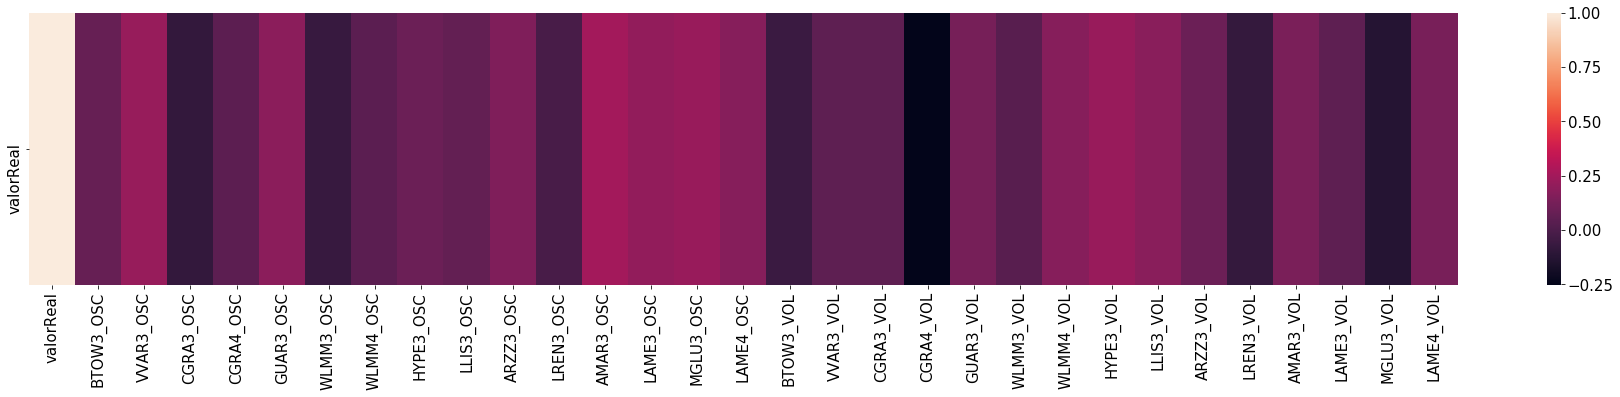

In [36]:
plt.figure(figsize=(32,5))
sns.heatmap( corr_va_fea_w )
sns.set_style("whitegrid")
plt.show()

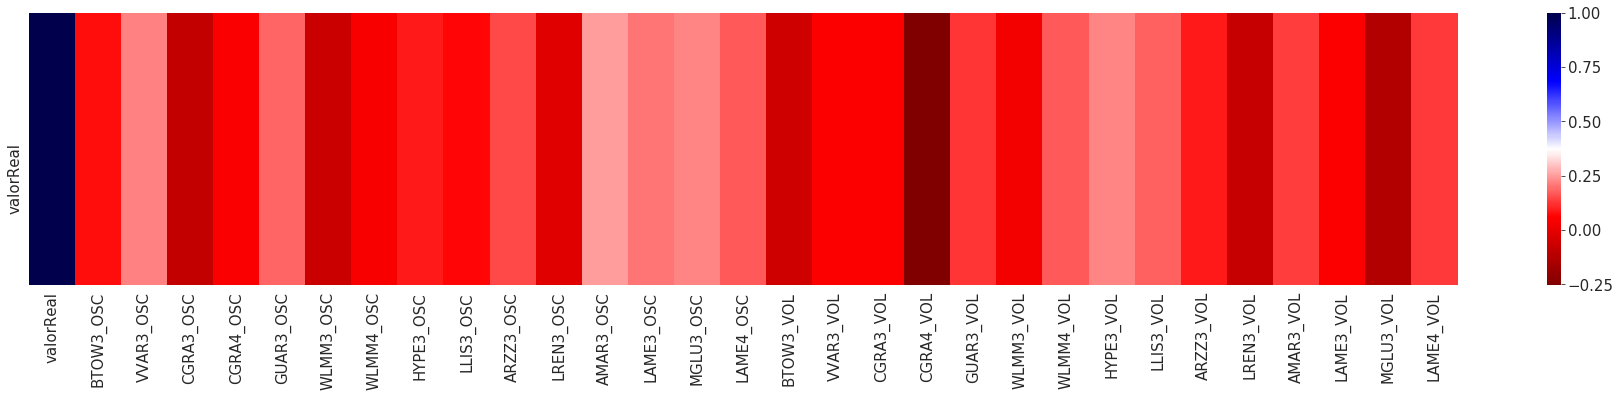

In [37]:
plt.figure(figsize=(32,5))
sns.heatmap( corr_va_fea_w, cmap='seismic_r' )
sns.set_style("whitegrid")
plt.show()

### Monthly correlation of stock values of trading papers on the Brazilian Stock Exchange

In [38]:
df_ass_osc_vol_m.columns = columns_origin_osc_vol_m

In [39]:
corr_va_osc_vol_m = df_ass_osc_vol_m.corr()[:1].drop(['mes'], axis=1)
corr_va_osc_vol_m.head()

,valorReal,BTOW3_OSC,VVAR3_OSC,CGRA3_OSC,CGRA4_OSC,GUAR3_OSC,WLMM3_OSC,WLMM4_OSC,HYPE3_OSC,LLIS3_OSC,...,WLMM3_VOL,WLMM4_VOL,HYPE3_VOL,LLIS3_VOL,ARZZ3_VOL,LREN3_VOL,AMAR3_VOL,LAME3_VOL,MGLU3_VOL,LAME4_VOL
valorReal,1.0,0.316535,0.14354,0.284701,0.189721,0.526402,-0.387757,-0.263773,0.492463,0.32694,...,0.074772,0.011047,-0.202535,0.109867,0.32752,-0.61936,0.076829,0.111025,-0.179164,0.137807


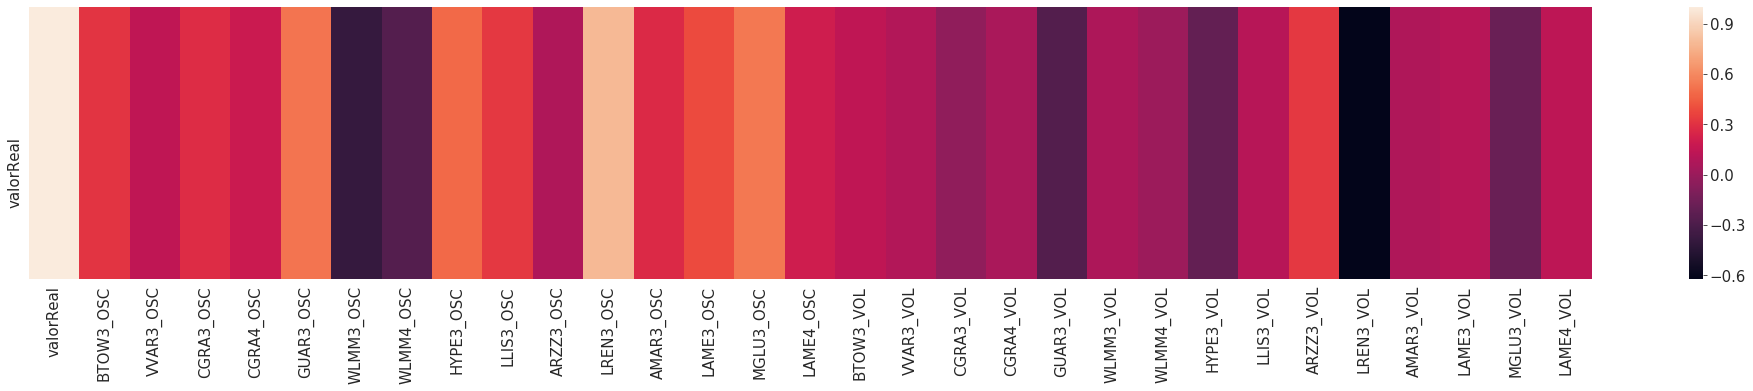

In [40]:
plt.figure(figsize=(35,5))
sns.heatmap( corr_va_osc_vol_m )
sns.set_style("whitegrid")
plt.show()

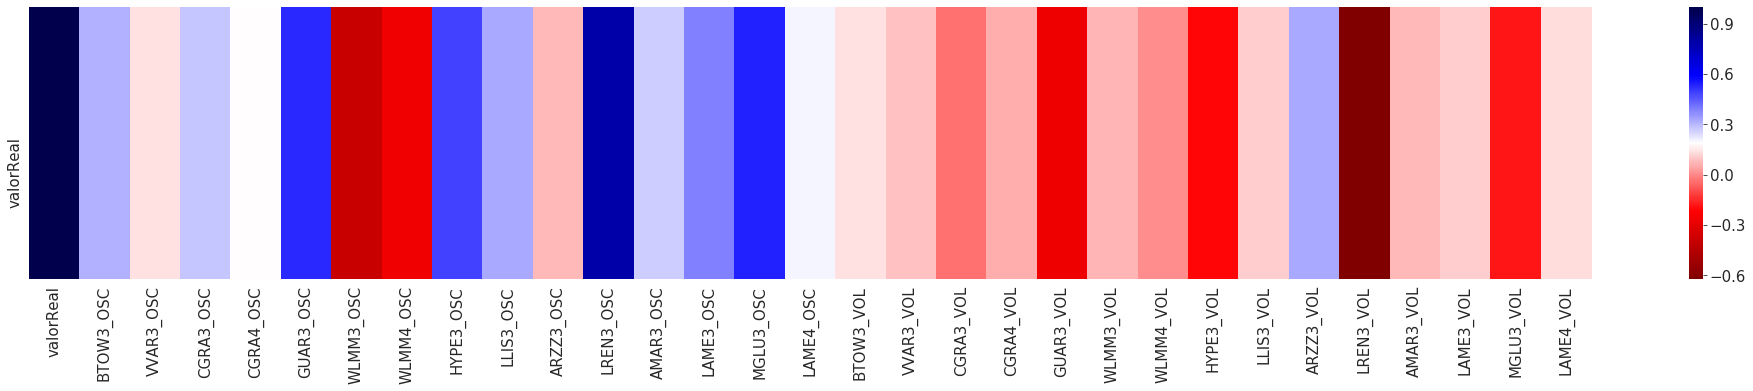

In [41]:
plt.figure(figsize=(35,5))
sns.heatmap( corr_va_osc_vol_m, cmap='seismic_r' )
sns.set_style("whitegrid")
plt.show()

### Monthly correlation of dollar and gasoline values on trading papers

In [42]:
df_ass_gas_dol_m.columns = columns_origin_gas_dol_m

In [43]:
corr_va_gas_dol_m = df_ass_gas_dol_m.drop(['mes'], axis=1).corr()[:1]
corr_va_gas_dol_m.head()

,valorReal,PREÇO_MÉDIO_REVENDA,DESVIO_PADRÃO_REVENDA,PREÇO_MÍNIMO_REVENDA,PREÇO_MÁXIMO_REVENDA,PREÇO_MÉDIO_DISTRIBUIÇÃO,DESVIO_PADRÃO_DISTRIBUIÇÃO,PREÇO_MÍNIMO_DISTRIBUIÇÃO,PREÇO_MÁXIMO_DISTRIBUIÇÃO,Dólar
valorReal,1.0,0.329136,-0.095104,-0.081181,0.008526,0.270927,0.045024,0.224321,0.118315,-0.095268


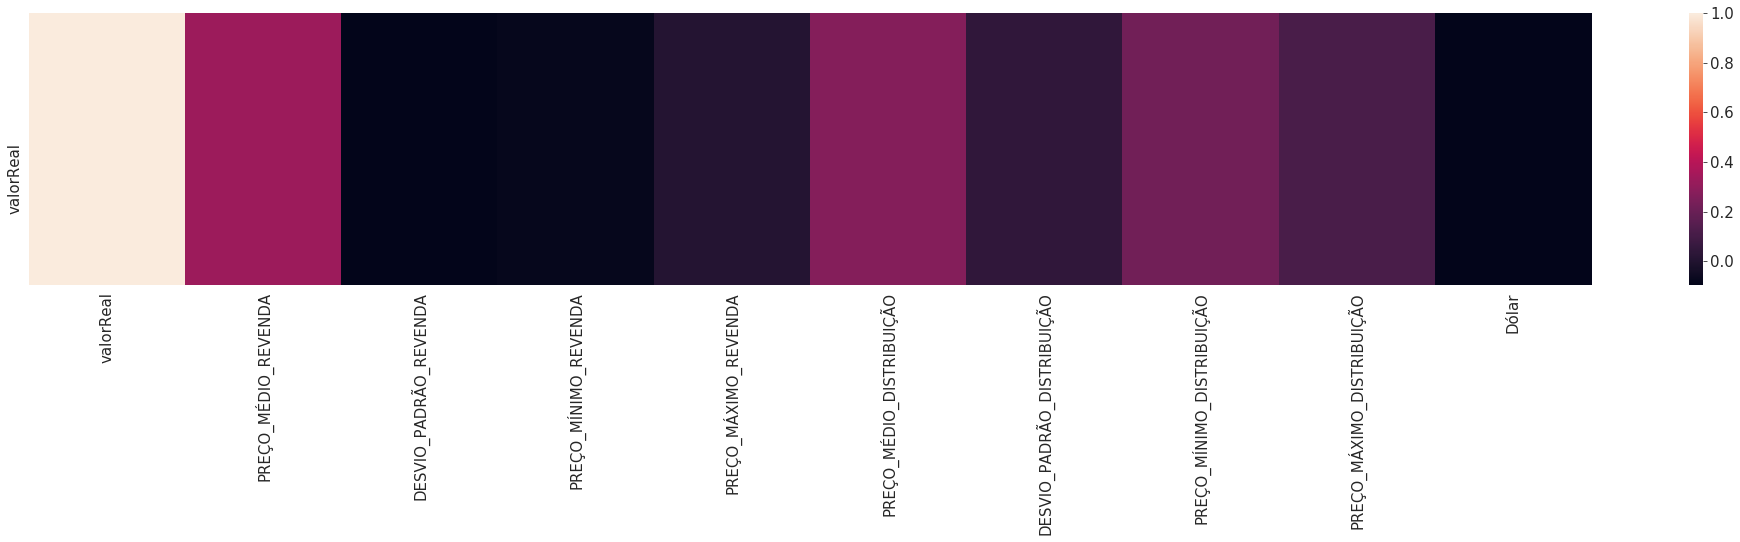

In [44]:
plt.figure(figsize=(35,5))
sns.heatmap( corr_va_gas_dol_m )
sns.set_style("whitegrid")
plt.show()

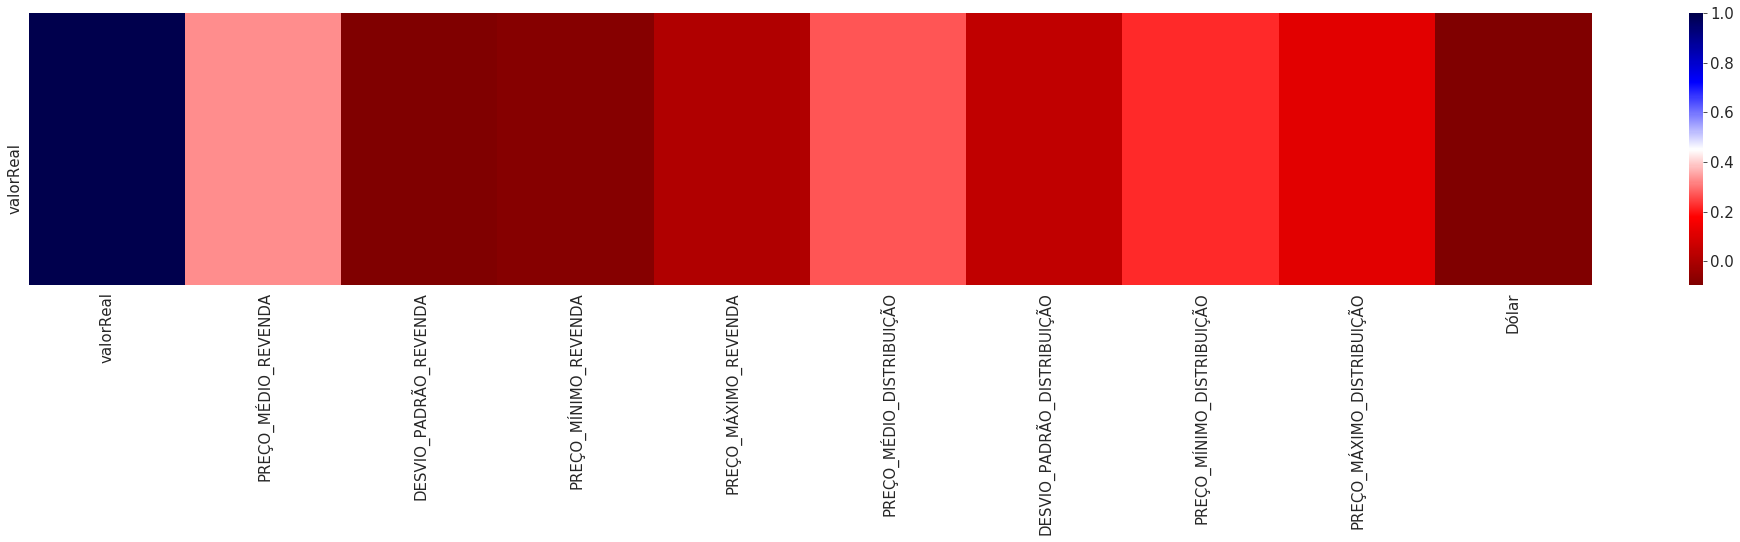

In [45]:
plt.figure(figsize=(35,5))
sns.heatmap( corr_va_gas_dol_m, cmap='seismic_r' )
sns.set_style("whitegrid")
plt.show()

## Feature >50% correlation (Month)

In [46]:
# corr_va_gas_dol_m - corr_va_osc_vol_m
corr_va_feat = pd.concat( [corr_va_gas_dol_m, corr_va_osc_vol_m], sort=False, axis=1)
corr_va_feat.head()

,valorReal,PREÇO_MÉDIO_REVENDA,DESVIO_PADRÃO_REVENDA,PREÇO_MÍNIMO_REVENDA,PREÇO_MÁXIMO_REVENDA,PREÇO_MÉDIO_DISTRIBUIÇÃO,DESVIO_PADRÃO_DISTRIBUIÇÃO,PREÇO_MÍNIMO_DISTRIBUIÇÃO,PREÇO_MÁXIMO_DISTRIBUIÇÃO,Dólar,...,WLMM3_VOL,WLMM4_VOL,HYPE3_VOL,LLIS3_VOL,ARZZ3_VOL,LREN3_VOL,AMAR3_VOL,LAME3_VOL,MGLU3_VOL,LAME4_VOL
valorReal,1.0,0.329136,-0.095104,-0.081181,0.008526,0.270927,0.045024,0.224321,0.118315,-0.095268,...,0.074772,0.011047,-0.202535,0.109867,0.32752,-0.61936,0.076829,0.111025,-0.179164,0.137807


In [47]:
corr_va_feat_T = corr_va_feat.transpose()
features = list(corr_va_feat_T[(abs(corr_va_feat_T['valorReal']) >= 0.5) & (abs(corr_va_feat_T['valorReal']) < 1)].index)

In [48]:
features

['GUAR3_OSC', 'LREN3_OSC', 'MGLU3_OSC', 'LREN3_VOL']

In [49]:
df_res = pd.concat([df_ass_gas_dol_m, df_ass_osc_vol_m], sort=False, axis=1)[features]
df_res = pd.concat([df_by_month, df_res], sort=False, axis=1) # Dados do assinante com as features importantes
df_res.head()

,valorReal,mes,GUAR3_OSC,LREN3_OSC,MGLU3_OSC,LREN3_VOL
data,,,,,,
2019-01,1750747.66,1,-0.273718,0.197302,-0.217671,4.570757e+06
2019-02,1734923.14,2,-0.369437,-0.270571,-0.214189,4.116321e+06
2019-03,2093308.82,3,-0.109513,0.046937,-0.040530,4.566687e+06
2019-04,2004346.64,4,-0.013389,0.304639,0.450086,4.516233e+06
2019-05,1891051.01,5,-0.697798,0.131502,0.077726,3.927686e+06


In [50]:
df_res.tail()

,valorReal,mes,GUAR3_OSC,LREN3_OSC,MGLU3_OSC,LREN3_VOL
data,,,,,,
2019-10,2041344.21,10,-0.112500,0.010729,0.776114,3.901535e+06
2019-11,1828478.39,11,0.066664,0.090200,0.001537,3.936000e+06
2019-12,2418845.36,12,0.917123,0.421742,0.293242,3.709658e+06
2020-01,2009527.79,1,0.808543,0.090336,0.684593,3.935991e+06
2020-02,1371184.12,2,-0.352723,-0.482605,-0.651598,5.999741e+06


In [51]:
path_pred = '../../../data/pred/'
name_dataset = 'df_to_pred.csv'

df_res.to_csv(path_pred + name_dataset)